In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load the dataset
twilight_labeled = pd.read_excel('6_labeled.xlsx')

In [3]:
# Cleaning data

# Rename column for consistency
twilight_labeled = twilight_labeled.rename(columns={"sentiment ": "sentiment"})

#Drop Row with missing values in columns sentiment and comment_body
twilight_labeled = twilight_labeled.dropna(subset=['sentiment', 'comment_body'])

# Ensure manually labeled sentiment is in the correct format
twilight_labeled['sentiment'] = twilight_labeled['sentiment'].replace({'positive ': "positive", 'negative ': "negative", 'neutral ': "neutral"})

In [4]:
# Initialize VADER 
# Predict: label sentiments using compound score

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]
    return "positive" if compound >= 0.05 else "negative" if compound <= -0.05 else "neutral"

#Run VADER on the labeled dataset
twilight_labeled["vader_sentiment"] = twilight_labeled["comment_body"].astype(str).apply(get_vader_sentiment)
# Save the labeled dataset with VADER predictions
twilight_labeled.to_excel('6_labeled_vader.xlsx', index=False)


VADER Accuracy: 0.4914

VADER Classification Report:
              precision    recall  f1-score   support

    negative       0.46      0.39      0.43        84
     neutral       0.54      0.31      0.39        98
    positive       0.49      0.73      0.59       109

    accuracy                           0.49       291
   macro avg       0.50      0.48      0.47       291
weighted avg       0.50      0.49      0.47       291



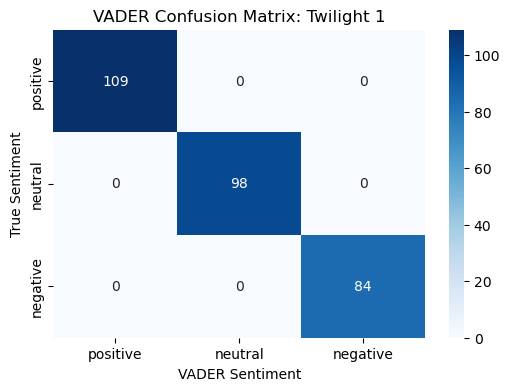

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate VADER's performance

#VADER Evaluation
valid_data = twilight_labeled.dropna(subset=['vader_sentiment'])
accuracy = accuracy_score(valid_data['sentiment'], valid_data['vader_sentiment'])
print(f"VADER Accuracy: {accuracy:.4f}")
print("\nVADER Classification Report:")
print(classification_report(valid_data['sentiment'], valid_data['vader_sentiment']))

# VADER Confusion Matrix
cm_vader = confusion_matrix(valid_data['sentiment'], valid_data['sentiment'], labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('VADER Confusion Matrix: Twilight 1')
plt.xlabel('VADER Sentiment')
plt.ylabel('True Sentiment')
plt.savefig('twilight1_vader_confusion_matrix.png')    
plt.show()



In [6]:
print(twilight_labeled['vader_sentiment'].value_counts())
print(twilight_labeled['sentiment'].value_counts())

vader_sentiment
positive    164
negative     71
neutral      56
Name: count, dtype: int64
sentiment
positive    109
neutral      98
negative     84
Name: count, dtype: int64
